# Example 2.1: SGD of a linear neuron

In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt

In [2]:
# set parameters
no_epochs = 200
lr = 0.01

SEED = 10
np.random.seed(SEED)

In [3]:
# generate training data
X = 2*np.random.rand(6, 2) - 1
Y = np.dot(X, [2.53, -0.47]) + np.random.rand(6) - 0.5

print('X: {}'.format(X))
print('Y: {}'.format(Y))

X: [[ 0.54264129 -0.9584961 ]
 [ 0.26729647  0.49760777]
 [-0.00298598 -0.55040671]
 [-0.60387427  0.52106142]
 [-0.66177833 -0.82332037]
 [ 0.37071964  0.90678669]]
Y: [ 1.32732389  0.45457668  0.5637576  -1.66017471 -1.06558327  0.303607  ]


In [4]:
# class for a linear neuron
class Linear():
  def __init__(self):
    self.w = torch.tensor(np.random.rand(2), requires_grad=True) #to use torch.autograd later
    self.b = torch.tensor(0., requires_grad=True)

  def __call__(self, x):
    return torch.inner(torch.tensor(x) ,self.w) + self.b

In [5]:
# squared error as the loss function
loss_fn = torch.nn.MSELoss(reduction="sum")  

The main function to train the neuron starts here

In [6]:
model = Linear()
print('w: {}, b: {}'.format(model.w.detach().numpy(), model.b.detach().numpy()))

w: [0.91777412 0.71457578], b: 0.0


In [7]:
# keep an index for training
idx = np.arange(len(X))

err = []
for epoch in range(no_epochs):
  np.random.shuffle(idx)
  X, Y = X[idx], Y[idx]
    
  err_ = []
  for p in np.arange(len(X)):
    
    y = model(X[p])
    loss_ = loss_fn(y, torch.tensor(Y[p]))
    
    loss_.backward()
    
    with torch.no_grad():
        model.w -= lr * model.w.grad
        model.b -= lr * model.b.grad
    
    model.w.grad = None
    model.b.grad = None
    
    with torch.no_grad():
        err_.append(loss_.numpy())
    
        # print values for the first iteration
        if epoch == 0:
          print('iter: {}'.format(epoch+1))
          print('p: {}'.format(p+1))
          print('x:{}, d:{}'.format(X[p], Y[p]))
          print('y: {}'.format(y.numpy()))
          print('se: {}'.format(loss_.numpy()))
          print('w: {}, b: {}'.format(model.w.detach().numpy(), model.b.detach().numpy()))
 
  err.append(np.mean(err_))
  if epoch%10 == 0:
        print('iter: %3d, mse: %1.4f'%(epoch, err[epoch]))

iter: 1
p: 1
x:[ 0.54264129 -0.9584961 ], d:1.3273238888598116
y: -0.18689597186907322
se: 2.2928617866258034
w: [0.93420769 0.68554831], b: 0.030284397304058075
iter: 1
p: 2
x:[-0.66177833 -0.82332037], d:-1.0655832748853409
y: -1.1523798892952857
se: 0.007533652273028636
w: [0.93305888 0.68411908], b: 0.03202033042907715
iter: 1
p: 3
x:[-0.00298598 -0.55040671], d:0.5637575971042241
y: -0.34730949086237
se: 0.8300432387759297
w: [0.93300448 0.67408993], b: 0.05024167150259018
iter: 1
p: 4
x:[0.26729647 0.49760777], d:0.454576682526435
y: 0.6350628575917815
se: 0.0325752593897189
w: [0.93203961 0.6722937 ], b: 0.04663194715976715
iter: 1
p: 5
x:[-0.60387427  0.52106142], d:-1.6601747069539354
y: -0.16589647757360584
se: 2.232867426800013
w: [0.95008673 0.65672149], b: 0.016746383160352707
iter: 1
p: 6
x:[0.37071964 0.90678669], d:0.30360700368844684
y: 0.9644684978958867
se: 0.4367379145260901
w: [0.94518685 0.64473628], b: 0.0035291537642478943
iter:   0, mse: 0.9721
iter:  10, mse: 

In [8]:
# print learned weights
print('w: %s, b: %s'%(model.w.detach().numpy(), model.b.detach().numpy()))

w: [ 2.09160566 -0.44760788], b: -0.012222247


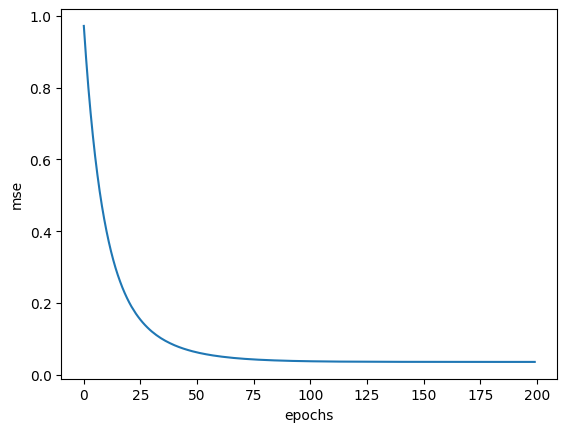

In [9]:
# print learning curve
plt.figure(1)
plt.plot(range(no_epochs), err)
plt.xlabel('epochs')
plt.ylabel('mse')
plt.show()

In [10]:
pred = []
for p in np.arange(len(X)):
	pred.append(model(X[p]).item())

print(pred)

[1.5517997452002952, 0.227898650008344, -1.0278768527219886, 0.3572921727817562, 0.32412340419691876, -1.5085202867383656]


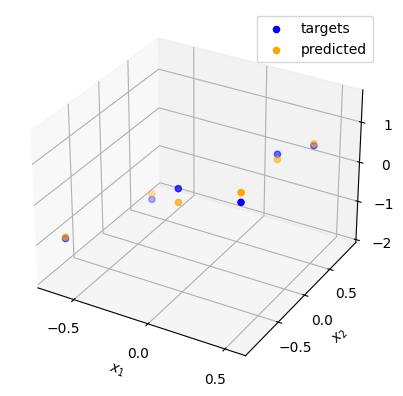

In [11]:
#print targets and predictions
fig = plt.figure(2)
ax = plt.axes(projection = '3d')
plot_original = ax.scatter(X[:,0], X[:,1], Y, c='blue', label='targets')
plot_pred = ax.scatter(X[:,0], X[:,1], pred, c='orange', label='predicted')
X1 = np.arange(-1, 1, 0.1)
X2 = np.arange(-1, 1, 0.1)
X1,X2 = np.meshgrid(X1,X2)
# Z = model.w.numpy()[0]*X1 + model.w.numpy()[1]*X2 + model.b.numpy()
# regression_plane = ax.scatter3D(X1, X2, Z)
ax.set_zticks([ -2, -1, 0, 1])
ax.set_xticks([-0.5, 0, 0.5])
ax.set_yticks([-0.5, 0, 0.5])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.legend()
plt.show()

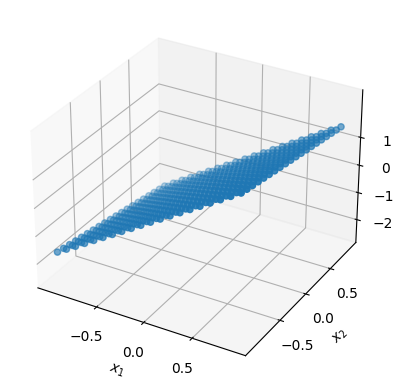

In [12]:
#print targets and predictions
fig = plt.figure(3)
ax = plt.axes(projection = '3d')
# plot_original = ax.scatter(X[:,0], X[:,1], Y, c='blue', label='targets')
# plot_pred = ax.scatter(X[:,0], X[:,1], pred, c='orange', label='predicted')
X1 = np.arange(-1, 1, 0.1)
X2 = np.arange(-1, 1, 0.1)
X1,X2 = np.meshgrid(X1,X2)
Z = model.w.detach().numpy()[0]*X1 + model.w.detach().numpy()[1]*X2 + model.b.detach().numpy()
regression_plane = ax.scatter3D(X1, X2, Z)
ax.set_zticks([ -2, -1, 0, 1])
ax.set_xticks([-0.5, 0, 0.5])
ax.set_yticks([-0.5, 0, 0.5])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
# plt.legend()
plt.show()